## Figure 4 2 The comparison of Total Annualised Cost per Household (TACH) (Int$ 2020) between the CACTUS database and Narok town as of September 2022. The box plots present the range of TACH for each component except Narok town. Yellow circle icons are the cost of Narok town for each component. The components on the left side are for the faecal sludge management system, and on the other side are for sewage systems.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

In [35]:
# variables
path_excel = r'data.xlsx'
sheetname = r'component_compare'
dpi = 700
file_path = r'fig4-2_component_compare.png'

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 14

In [61]:
# create boxplots by given parameters
def createBoxPlot(
    path_excel,
    sheetname,
    ax, 
    groupby_col, 
    value_col, 
    title, 
    xlabel, 
    ylabel,
    max_y,
    min_y,
    duration_y
):
    df = pd.read_excel(path_excel, sheet_name=sheetname)
    
    groups = df.groupby(groupby_col, sort=False)
    group_labels = list(groups.groups.keys())
    data = [group[1][value_col] for group in groups]

    bp = ax.boxplot(data, showmeans=True)
    
    # make median line black
    for median in bp['medians']:
        median.set_color('black')

    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    
    xtick_labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in groups.groups.keys() ]
    ax.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)
        
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')
    
    ax.set_yticks(np.arange(min_y, max_y, duration_y))


<function matplotlib.pyplot.show(close=None, block=None)>

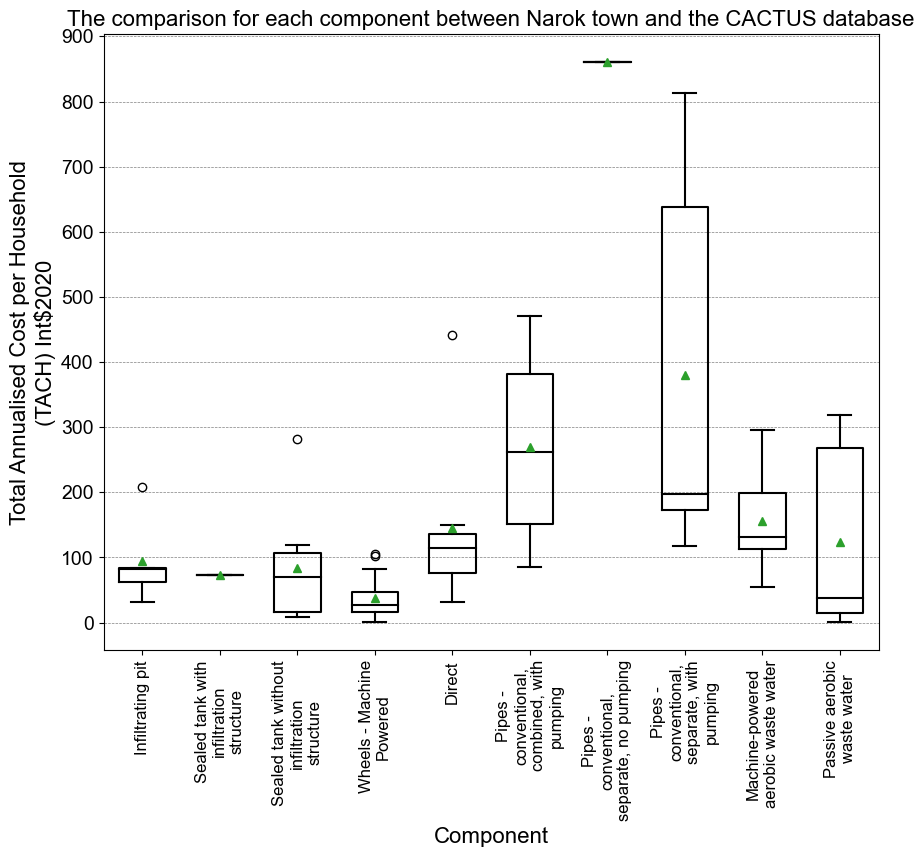

In [62]:
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(1, 1, 1)

createBoxPlot(
    path_excel,
    sheetname,
    ax1, 
    groupby_col = 'component', 
    value_col = 'tach', 
    title = 'The comparison for each component between Narok town and the CACTUS database', 
    xlabel = 'Component', 
    ylabel = 'Total Annualised Cost per Household\n(TACH) Int$2020',
    max_y = 1000,
    min_y = 0,
    duration_y = 100
)

plt.show